<a href="https://colab.research.google.com/github/Mv0sKff/MyDeepLearning/blob/main/week_3/Assignment_Basic_MLP_in_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build basic 2-Layer MLP to solve the xor-Problem

In [9]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generatio
from sklearn.model_selection import train_test_split

In [10]:
X, y = make_blobs(n_samples=200, n_features=2, cluster_std=.1
                  ,centers= [(1,1), (1,0), (0,0),(0,1)])

In [11]:
#make blobs into binary problem
y[y==2]=0
y[y==3]=1

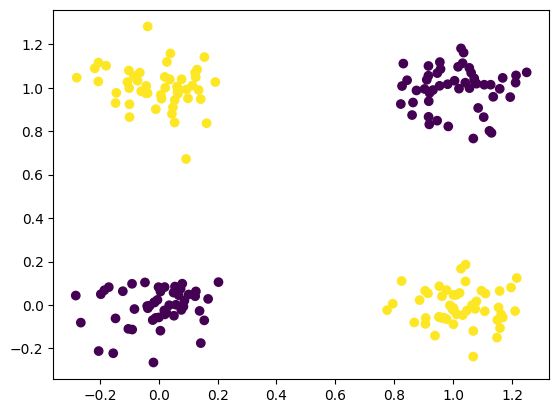

In [12]:
plt.scatter(X[:,0],X[:,1],c=y)

## Steps:
* build train and test sets
* write MLP class in Pytorch with two layers with adjustable number of perceptrons
* use nn.linear and nn.Sigmoid() units
* train your model
* test your model

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [14]:
y_train

tensor([0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
        0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
        1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
        1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
        1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
        0., 1., 0., 1., 0., 1., 1., 0.])

In [15]:
import torch
class MLP(torch.nn.Module): #all nets inherit from nn.Module
    def __init__(self, hidden_sizes, input_size, output_size): #define layer types
        super(MLP, self).__init__()
        #hidden_sizes=[64, 32]
        #self.fc1 = torch.nn.Linear(2,2,bias=False) # Perceptron is single neuron "fully connected" (fc) -> linear unit with 2 inputs and 1 output
        #self.fc2 = torch.nn.Linear(2,2,bias=False)
        #self.fc3 = torch.nn.Linear(2,1,bias=False) # Perceptron is single neuron "fully connected" (fc) -> linear unit with 2 inputs and 1 output

        #self.fc1 = torch.nn.Linear(2,hidden_sizes[0],bias=False)
        #self.fc2 = torch.nn.Linear(hidden_sizes[0],hidden_sizes[1],bias=False)
        #self.fc3 = torch.nn.Linear(hidden_sizes[1],1,bias=False)

        self.fc1 = torch.nn.Linear(input_size, hidden_sizes[0])
        self.fc2 = torch.nn.Linear(hidden_sizes[0], output_size)

        self.non_linear = torch.nn.Sigmoid() #non-linear activation

    def forward(self, x): #build network
        #output = self.fc1(x) #w*X
        #output = self.fc2(x) #w*X
        #output = self.fc3(output) #w*X
        #output = self.non_linear(output) # activation
        #return output
        x = self.non_linear(self.fc1(x))
        x = self.non_linear(self.fc2(x))
        return x

In [16]:
#get instance of perceptron model
model = MLP([2, 2], 2, 1)

#define loss function
criterion = torch.nn.BCELoss()

#define optimizer -> SGD with learning rate lr
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

In [17]:
model.eval()
model(x_test)
print()

In [18]:
model.train() #set to train mode
epoch = 20000
for epoch in range(epoch):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x_train)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train)

    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    #make gradient update
    optimizer.step()

Streaming output truncated to the last 5000 lines.
Epoch 15000: train loss: 0.02389441803097725
Epoch 15001: train loss: 0.023889407515525818
Epoch 15002: train loss: 0.023884398862719536
Epoch 15003: train loss: 0.023879388347268105
Epoch 15004: train loss: 0.02387438900768757
Epoch 15005: train loss: 0.023869387805461884
Epoch 15006: train loss: 0.0238643866032362
Epoch 15007: train loss: 0.023859387263655663
Epoch 15008: train loss: 0.023854391649365425
Epoch 15009: train loss: 0.02384939417243004
Epoch 15010: train loss: 0.023844407871365547
Epoch 15011: train loss: 0.023839419707655907
Epoch 15012: train loss: 0.023834431543946266
Epoch 15013: train loss: 0.023829448968172073
Epoch 15014: train loss: 0.023824471980333328
Epoch 15015: train loss: 0.023819485679268837
Epoch 15016: train loss: 0.023814504966139793
Epoch 15017: train loss: 0.023809531703591347
Epoch 15018: train loss: 0.023804549127817154
Epoch 15019: train loss: 0.023799574002623558
Epoch 15020: train loss: 0.0237945

In [19]:
model.eval()

#train
y_pred = model(x_train) #predict
y_pred=(y_pred>0.5).int().flatten() #argmax class lable
train_acc =torch.sum(y_pred == y_train.int())/ y_train.shape[0]
print("train ACC: ",train_acc.float())

train ACC:  tensor(1.)


In [20]:
#test
y_pred = model(x_test) #predict
y_pred = (y_pred>0.5).int().flatten() #argmax class lable
test_acc = torch.sum(y_pred == y_test.int()) / y_test.shape[0]
print("test ACC: ",test_acc.float())

test ACC:  tensor(1.)


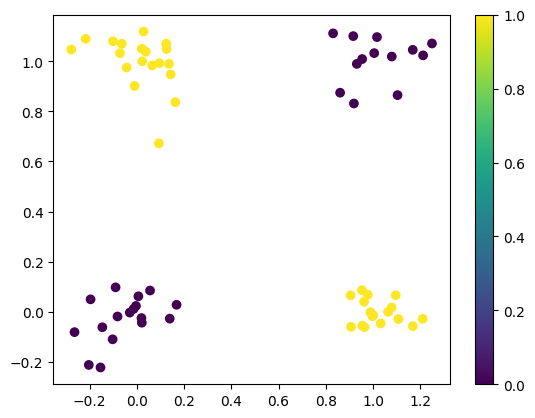

In [21]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_pred)
plt.colorbar()